<a href="https://colab.research.google.com/github/Ratnesh-bhosale/Drone-Deep-Reinforcement-Learning/blob/main/Drone_Deep_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd

In [108]:
flight = pd.read_csv('flights.csv', dtype='unicode')

In [109]:
flight.head()

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.100000001,12.0,24.22217369,0.087469511,-79.78239570000002,40.45804724,269.3324017,0.001772306,0.005609551,-0.255525738,0.966784358,-0.012825926,-0.005644709,0.010474564,-0.0008251889999999999,0.0014074279999999998,0.006815216999999999,0.004257701,-0.120404978,-9.811136699,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.2,0.100000001,3.0,24.22718048,0.095421284,-79.78239587,40.45804729,269.332056,0.001767616,0.005606697,-0.255530089,0.966783345,-0.015409501,-0.001635618,0.010136867,1.24e-06,-0.002861936,0.002033538,0.006174664,-0.116396593,-9.810391763,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.3,0.100000001,352.0,24.22592926,0.095421284,-79.78239589,40.4580473,269.3330812,0.001767616,0.005606697,-0.255530089,0.966783345,-0.016513727,-0.001821677,0.009980725,-7.31e-06,-0.001485685,-0.0008742989999999999,0.002696266,-0.128591638,-9.809439837000001,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.5,0.100000001,354.0,24.22467804,0.095421284,-79.78239603,40.45804731,269.33464810000004,0.001775031,0.00561423,-0.255523652,0.966784894,-0.007775039,-0.005263036,0.01509068,0.001255224,-0.000347319,0.002443233,0.002024007,-0.12827085400000002,-9.810159044,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.6,0.100000001,359.0,24.21090508,0.079517737,-79.78239604,40.45804731,269.3361778,0.001775031,0.00561423,-0.255523652,0.966784894,-0.009060158,-0.005173516,0.015142142,-0.002383463,0.000181737,-0.006424722,0.008270765,-0.119889629,-9.812124877999999,4.0,0.0,25,2019-04-07,10:13,R5


In [110]:
flight.info

<bound method DataFrame.info of        flight    time          wind_speed  ...        date time_day route
0           1     0.0         0.100000001  ...  2019-04-07    10:13    R5
1           1     0.2         0.100000001  ...  2019-04-07    10:13    R5
2           1     0.3         0.100000001  ...  2019-04-07    10:13    R5
3           1     0.5         0.100000001  ...  2019-04-07    10:13    R5
4           1     0.6         0.100000001  ...  2019-04-07    10:13    R5
...       ...     ...                 ...  ...         ...      ...   ...
257891    279   152.1   1.100000023841858  ...  2019-10-24    10:10    R7
257892    279   152.2   1.100000023841858  ...  2019-10-24    10:10    R7
257893    279  152.41  1.2000000476837158  ...  2019-10-24    10:10    R7
257894    279   152.6   1.100000023841858  ...  2019-10-24    10:10    R7
257895    279   152.7   1.100000023841858  ...  2019-10-24    10:10    R7

[257896 rows x 28 columns]>

In [111]:
par = pd.read_csv('parameters.csv', dtype='unicode')

In [112]:
par

,flight,speed,payload,altitude,date,local_time,route
0,1,4.0,0.0,25,2019-04-07,10:13,R5
1,2,4.0,0.0,50,2019-04-07,10:23,R5
2,3,6.0,0.0,25,2019-04-07,10:33,R5
3,4,8.0,0.0,25,2019-04-07,10:48,R5
4,5,4.0,0.0,25,2019-04-07,11:05,R2
...,...,...,...,...,...,...,...
204,275,8.0,500.0,25,2019-10-24,9:05,R1
205,276,10.0,500.0,25,2019-10-24,9:32,R1
206,277,10.0,500.0,25,2019-10-24,9:45,R1
207,278,10.0,500.0,25-50-100-25,2019-10-24,10:00,R7


In [113]:
import matplotlib.pyplot as plt

In [114]:
flight 

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.0,0.100000001,12.0,24.22217369,0.087469511,-79.78239570000002,40.45804724,269.3324017,0.001772306,0.005609551,-0.255525738,0.966784358,-0.012825926,-0.005644709,0.010474564,-0.0008251889999999999,0.0014074279999999998,0.006815216999999999,0.004257701,-0.120404978,-9.811136699,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.2,0.100000001,3.0,24.22718048,0.095421284,-79.78239587,40.45804729,269.332056,0.001767616,0.005606697,-0.255530089,0.966783345,-0.015409501,-0.001635618,0.010136867,1.24e-06,-0.002861936,0.002033538,0.006174664,-0.116396593,-9.810391763,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.3,0.100000001,352.0,24.22592926,0.095421284,-79.78239589,40.4580473,269.3330812,0.001767616,0.005606697,-0.255530089,0.966783345,-0.016513727,-0.001821677,0.009980725,-7.31e-06,-0.001485685,-0.0008742989999999999,0.002696266,-0.128591638,-9.809439837000001,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.5,0.100000001,354.0,24.22467804,0.095421284,-79.78239603,40.45804731,269.33464810000004,0.001775031,0.00561423,-0.255523652,0.966784894,-0.007775039,-0.005263036,0.01509068,0.001255224,-0.000347319,0.002443233,0.002024007,-0.12827085400000002,-9.810159044,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.6,0.100000001,359.0,24.21090508,0.079517737,-79.78239604,40.45804731,269.3361778,0.001775031,0.00561423,-0.255523652,0.966784894,-0.009060158,-0.005173516,0.015142142,-0.002383463,0.000181737,-0.006424722,0.008270765,-0.119889629,-9.812124877999999,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.1,1.100000023841858,198.0,22.857437133789066,0.09542128443717957,-79.78280157207773,40.459018121323645,271.56019008350376,0.021382490172982216,0.012705829925835129,-0.008265542797744274,0.9996564984321594,-0.018872519179028272,0.019701460870111244,0.016157783313693073,0.005570006091147661,-0.005111650563776493,0.009449041448533537,0.4445527328923345,-0.2749649140611291,-9.796699923276902,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257892,279,152.2,1.100000023841858,196.0,22.847421646118164,0.09542128443717957,-79.78280177304293,40.45901807554909,271.57198310089115,0.02138260938227177,0.012718598358333107,-0.008376835845410824,0.9996554255485536,-0.017868564112538867,0.015486079215095394,0.018405133980063867,0.0015653390437364578,0.0017212670063599946,-0.0017549749463796616,0.4512301800772548,-0.240619191583246,-9.793810229301453,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257893,279,152.41,1.2000000476837158,189.0,22.856185913085927,0.11132483184337616,-79.7828019982662,40.459018057995685,271.5845327396393,0.02138494327664376,0.012687048874795435,-0.008570614270865917,0.9996541142463684,-0.016401431211666068,0.018264529753962647,0.01592288442293993,0.008084182627499105,-0.002137540141120553,0.00854462943971157,0.4438389340415597,-0.2749029335752129,-9.79600410461426,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7
257894,279,152.6,1.100000023841858,187.0,22.85493278503418,0.12722837924957275,-79.78280203856887,40.45901809418356,271.58805036735544,0.021393148228526115,0.01267122384160757,-0.008760865777730942,0.9996525049209596,-0.019261965091875992,0.02392772967088276,0.01651398002370759,-0.009992232546210287,-0.0004387249064166099,-0.0013788641663268204,0.4438803030923009,-0.24843421457335355,-9.79470251441002,10.0,0.0,25-50-100-25,2019-10-24,10:10,R7


In [115]:
flight = flight[flight.route != 'A1']

In [116]:
flight = flight[flight.route != 'A2']

In [117]:
flight = flight[flight.route != 'A3']

In [118]:
flight.columns[1:24]

Index(['time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload'],
      dtype='object')

In [119]:
flight['date'] = pd.to_datetime(flight['date']+' '+flight['time_day'])

In [120]:
flight.replace('25-50-100-25','100',inplace=True)

In [121]:
import seaborn as sns
flight['route'].unique()

array(['R5', 'R2', 'R3', 'R4', 'R1', 'H', 'R6', 'R7'], dtype=object)

In [122]:
route_cat = {'R1':1,'R2':2,'R3':3,'R4':4,'R5':5,'R6':6,'R7':7,'H':8}
flight['route'] = flight['route'].apply(lambda x : route_cat.get(x,x))

In [123]:
columns = flight.columns[1:25].tolist()
columns

['time',
 'wind_speed',
 'wind_angle',
 'battery_voltage',
 'battery_current',
 'position_x',
 'position_y',
 'position_z',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'orientation_w',
 'velocity_x',
 'velocity_y',
 'velocity_z',
 'angular_x',
 'angular_y',
 'angular_z',
 'linear_acceleration_x',
 'linear_acceleration_y',
 'linear_acceleration_z',
 'speed',
 'payload',
 'altitude']

In [124]:
for col in columns:
    flight[col] = flight[col].astype('float')

In [125]:
flight['power'] = flight['battery_voltage'] * flight['battery_current']

In [126]:
columns.append('power')
columns

['time',
 'wind_speed',
 'wind_angle',
 'battery_voltage',
 'battery_current',
 'position_x',
 'position_y',
 'position_z',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'orientation_w',
 'velocity_x',
 'velocity_y',
 'velocity_z',
 'angular_x',
 'angular_y',
 'angular_z',
 'linear_acceleration_x',
 'linear_acceleration_y',
 'linear_acceleration_z',
 'speed',
 'payload',
 'altitude',
 'power']

In [127]:
for col in columns:
    flight[col] = flight[col].round(2)

In [128]:
flight

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,power
0,1,0.00,0.1,12.0,24.22,0.09,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.01,-0.00,0.00,0.01,0.00,-0.12,-9.81,4.0,0.0,25.0,2019-04-07 10:13:00,10:13,5,2.12
1,1,0.20,0.1,3.0,24.23,0.10,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.02,-0.00,0.01,0.00,-0.00,0.00,0.01,-0.12,-9.81,4.0,0.0,25.0,2019-04-07 10:13:00,10:13,5,2.31
2,1,0.30,0.1,352.0,24.23,0.10,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.02,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.13,-9.81,4.0,0.0,25.0,2019-04-07 10:13:00,10:13,5,2.31
3,1,0.50,0.1,354.0,24.22,0.10,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.02,0.00,-0.00,0.00,0.00,-0.13,-9.81,4.0,0.0,25.0,2019-04-07 10:13:00,10:13,5,2.31
4,1,0.60,0.1,359.0,24.21,0.08,-79.78,40.46,269.34,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.02,-0.00,0.00,-0.01,0.01,-0.12,-9.81,4.0,0.0,25.0,2019-04-07 10:13:00,10:13,5,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,279,152.10,1.1,198.0,22.86,0.10,-79.78,40.46,271.56,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.01,-0.01,0.01,0.44,-0.27,-9.80,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,2.18
257892,279,152.20,1.1,196.0,22.85,0.10,-79.78,40.46,271.57,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.00,0.00,-0.00,0.45,-0.24,-9.79,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,2.18
257893,279,152.41,1.2,189.0,22.86,0.11,-79.78,40.46,271.58,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.01,-0.00,0.01,0.44,-0.27,-9.80,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,2.54
257894,279,152.60,1.1,187.0,22.85,0.13,-79.78,40.46,271.59,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,-0.01,-0.00,-0.00,0.44,-0.25,-9.79,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,2.91


In [129]:
numeric = flight.columns[1:24].tolist()

In [130]:
numeric.append('power')
numeric.append('altitude')
numeric

['time',
 'wind_speed',
 'wind_angle',
 'battery_voltage',
 'battery_current',
 'position_x',
 'position_y',
 'position_z',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'orientation_w',
 'velocity_x',
 'velocity_y',
 'velocity_z',
 'angular_x',
 'angular_y',
 'angular_z',
 'linear_acceleration_x',
 'linear_acceleration_y',
 'linear_acceleration_z',
 'speed',
 'payload',
 'power',
 'altitude']

In [131]:
target = 'power'
categories = flight.columns[1:25].tolist()

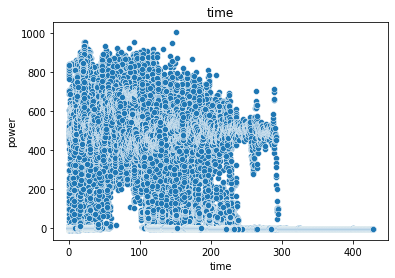

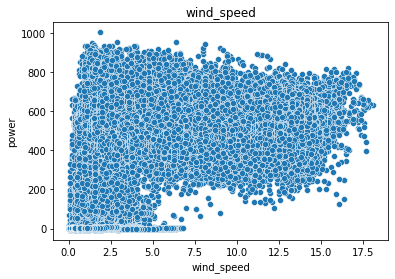

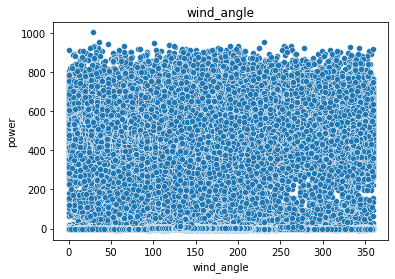

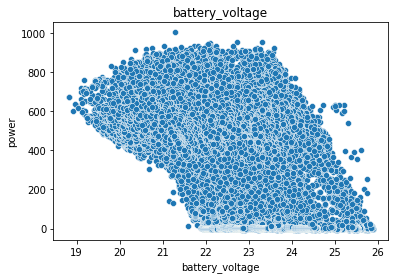

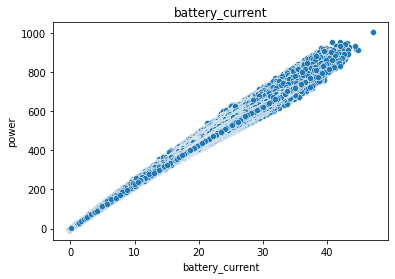

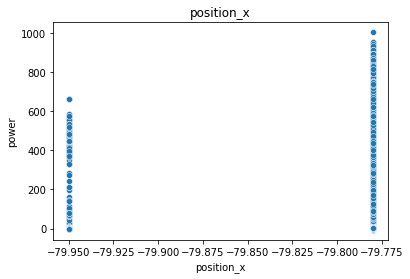

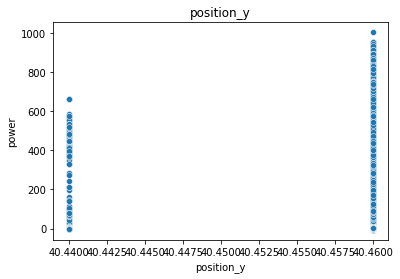

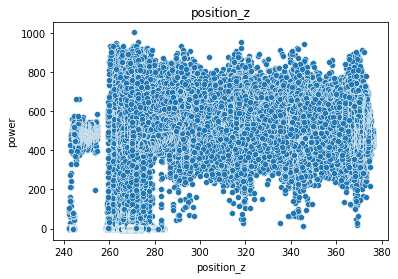

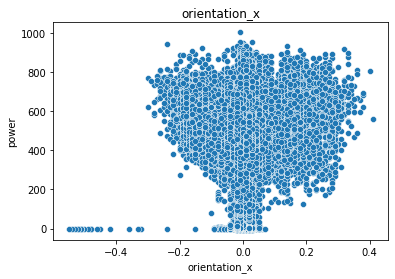

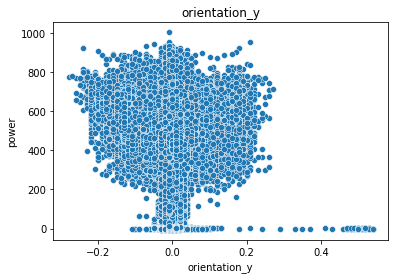

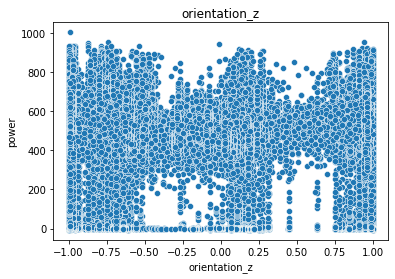

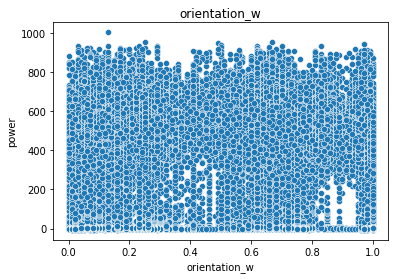

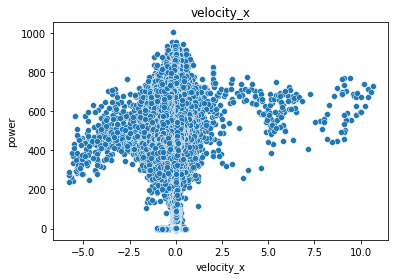

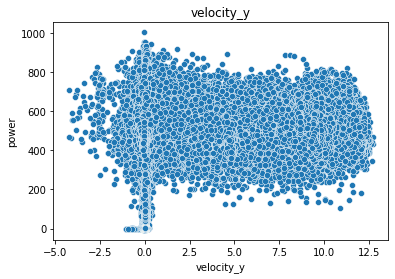

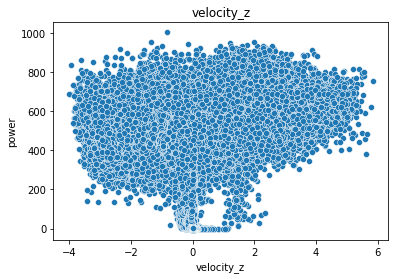

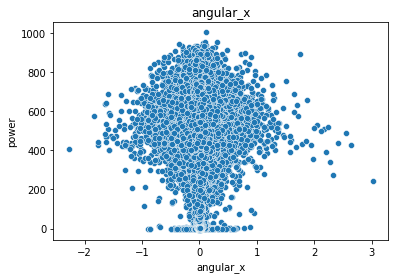

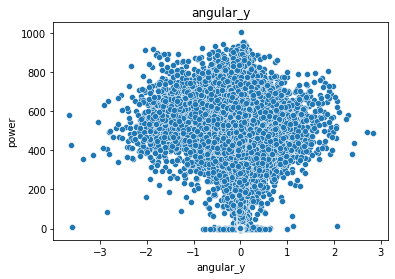

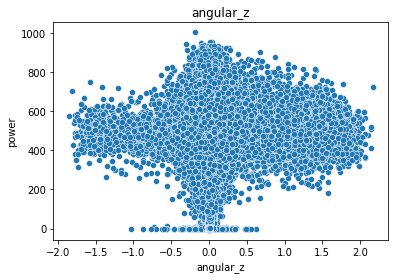

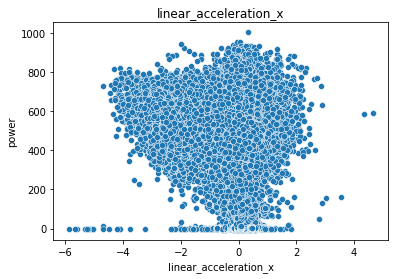

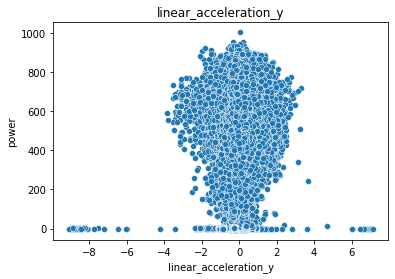

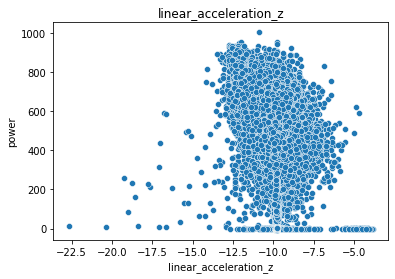

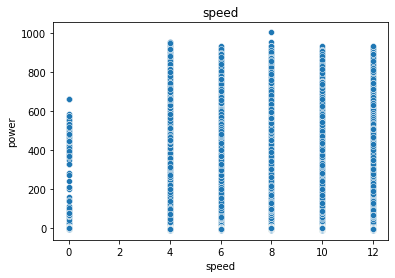

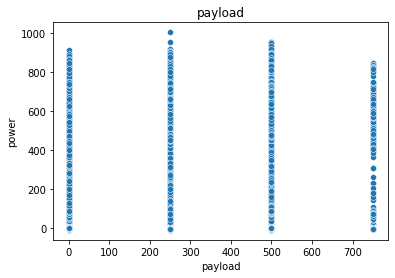

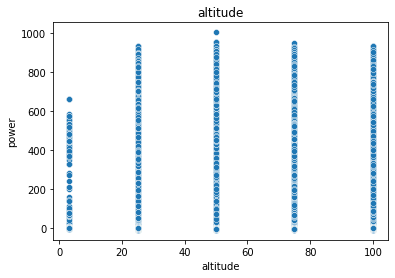

In [132]:
for cat in categories:
    sns.scatterplot(x=flight[cat],y=flight[target])
    plt.gca().set_title(cat)
    plt.show()

In [133]:
numeric

['time',
 'wind_speed',
 'wind_angle',
 'battery_voltage',
 'battery_current',
 'position_x',
 'position_y',
 'position_z',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'orientation_w',
 'velocity_x',
 'velocity_y',
 'velocity_z',
 'angular_x',
 'angular_y',
 'angular_z',
 'linear_acceleration_x',
 'linear_acceleration_y',
 'linear_acceleration_z',
 'speed',
 'payload',
 'power',
 'altitude']

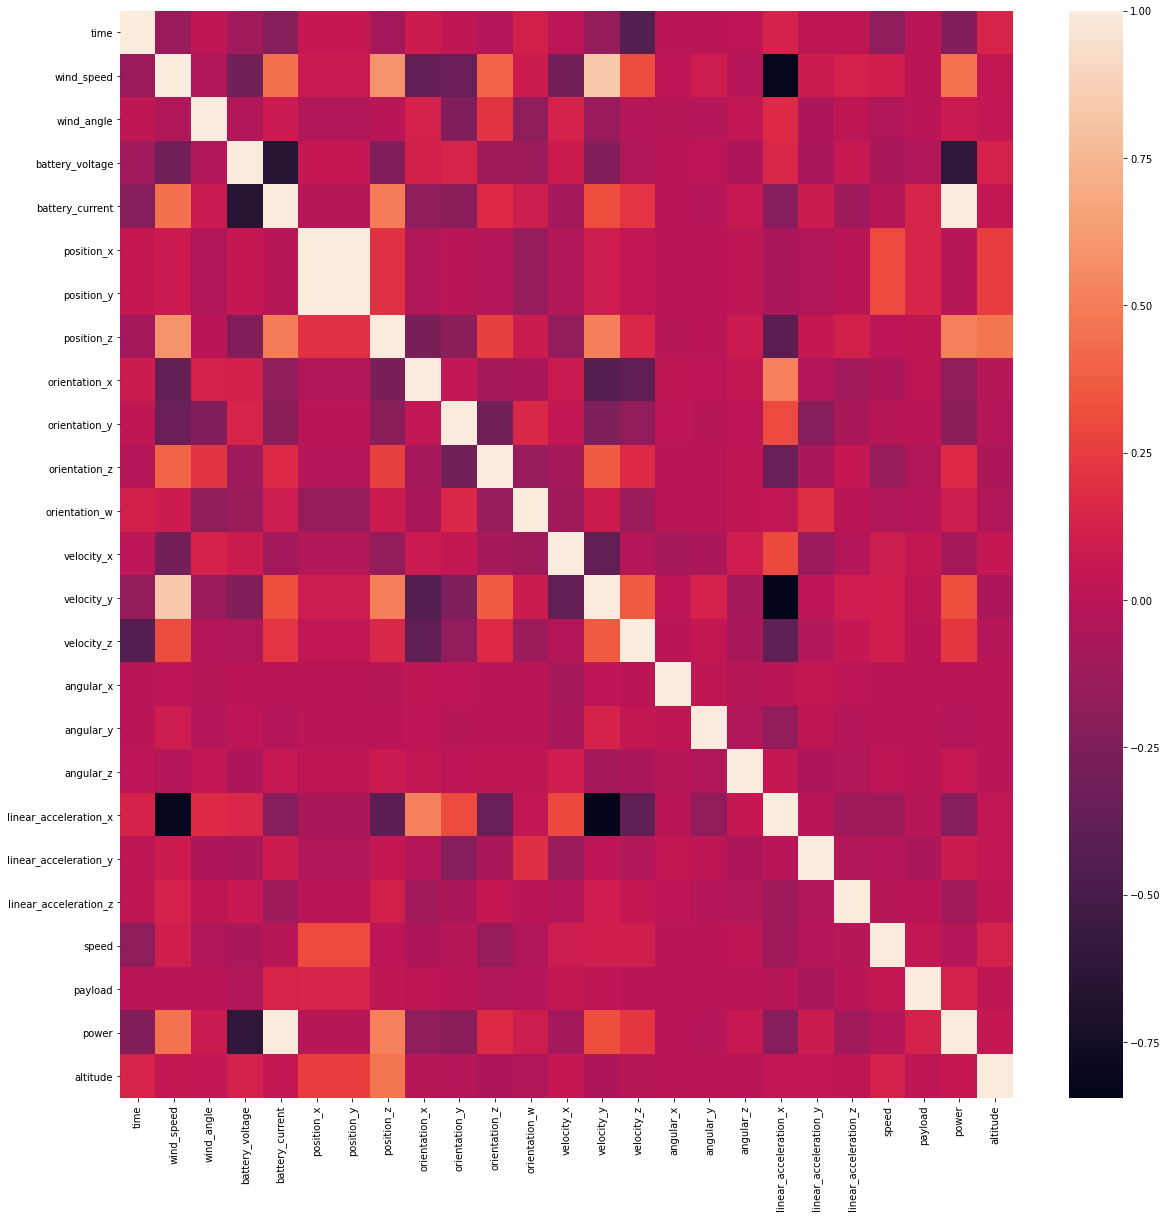

In [134]:
plt.figure(figsize=(20,20))
sns.heatmap(flight[numeric].corr())

In [135]:
flight[(flight['power'] == 0.0)&(flight['power']< 1.0)]

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,power
3148,3,0.0,0.4,134.0,25.41,0.0,-79.78,40.46,268.81,-0.00,0.01,0.32,0.95,-0.00,0.00,0.00,-0.00,-0.0,0.00,0.02,-0.12,-9.81,6.0,0.0,25.0,2019-04-07 10:33:00,10:33,5,0.0
3155,3,1.1,1.0,141.0,25.40,0.0,-79.78,40.46,268.74,-0.00,0.01,0.32,0.95,-0.01,0.01,-0.01,0.00,-0.0,0.00,0.02,-0.12,-9.81,6.0,0.0,25.0,2019-04-07 10:33:00,10:33,5,0.0
5417,4,160.2,1.8,145.0,23.14,0.0,-79.78,40.46,268.31,0.04,0.00,0.93,0.36,-0.01,0.00,-0.00,-0.00,0.0,-0.01,0.36,0.81,-9.77,8.0,0.0,25.0,2019-04-07 10:48:00,10:48,5,0.0
6878,5,208.5,1.2,194.0,23.56,0.0,-79.78,40.46,267.88,0.01,-0.01,0.85,0.52,0.01,0.00,0.01,0.00,0.0,0.01,-0.01,0.23,-9.81,4.0,0.0,25.0,2019-04-07 11:05:00,11:05,2,0.0
8309,7,1.5,1.1,221.0,24.41,0.0,-79.78,40.46,266.53,0.00,0.00,-0.80,0.60,0.00,-0.01,-0.02,-0.00,0.0,-0.01,-0.05,-0.08,-9.81,4.0,0.0,25.0,2019-05-06 15:43:00,15:43,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254868,277,2.5,1.6,128.0,25.47,0.0,-79.78,40.46,270.70,-0.01,-0.00,-0.98,0.19,-0.01,0.01,0.03,0.00,-0.0,0.01,-0.02,0.27,-9.81,10.0,500.0,25.0,2019-10-24 09:45:00,9:45,1,0.0
254872,277,3.1,1.6,125.0,25.48,0.0,-79.78,40.46,270.78,-0.01,-0.00,-0.98,0.19,-0.00,0.01,0.03,0.01,0.0,0.01,-0.01,0.27,-9.80,10.0,500.0,25.0,2019-10-24 09:45:00,9:45,1,0.0
254883,277,4.8,1.7,136.0,25.49,0.0,-79.78,40.46,270.98,-0.01,-0.00,-0.98,0.19,-0.00,0.01,0.02,-0.00,-0.0,-0.00,-0.02,0.28,-9.80,10.0,500.0,25.0,2019-10-24 09:45:00,9:45,1,0.0
256928,279,3.0,2.0,159.0,23.55,0.0,-79.78,40.46,273.29,-0.02,-0.01,-0.99,0.17,0.00,0.00,0.00,-0.00,0.0,-0.01,0.06,0.36,-9.80,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,0.0


In [136]:
flight_0 = flight[flight.power != 0]

In [137]:
flight_0[flight_0['power']<1]

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route,power
1339,2,0.00,1.7,156.0,23.18,0.03,-79.78,40.46,268.48,-0.00,0.01,0.30,0.95,-0.01,0.01,0.00,0.00,-0.00,0.01,0.02,-0.12,-9.81,4.0,0.0,50.0,2019-04-07 10:23:00,10:23,5,0.74
1342,2,0.41,1.5,166.0,23.18,0.04,-79.78,40.46,268.49,-0.00,0.01,0.30,0.95,-0.01,0.01,0.00,0.00,-0.00,0.00,0.02,-0.12,-9.81,4.0,0.0,50.0,2019-04-07 10:23:00,10:23,5,0.92
1344,2,0.70,1.5,170.0,23.19,0.03,-79.78,40.46,268.50,-0.00,0.01,0.30,0.95,-0.01,0.00,0.00,0.00,0.00,0.00,0.02,-0.11,-9.81,4.0,0.0,50.0,2019-04-07 10:23:00,10:23,5,0.74
1346,2,1.00,1.7,171.0,23.18,0.03,-79.78,40.46,268.50,-0.00,0.01,0.30,0.95,-0.01,0.00,0.00,-0.00,-0.00,-0.00,0.02,-0.11,-9.80,4.0,0.0,50.0,2019-04-07 10:23:00,10:23,5,0.74
1347,2,1.20,1.7,173.0,23.18,0.03,-79.78,40.46,268.51,-0.00,0.01,0.30,0.95,-0.00,0.00,0.01,-0.00,-0.00,-0.01,0.02,-0.12,-9.81,4.0,0.0,50.0,2019-04-07 10:23:00,10:23,5,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256940,279,4.80,1.5,158.0,23.56,0.03,-79.78,40.46,273.15,-0.02,-0.01,-0.99,0.17,0.00,0.01,-0.01,0.01,0.01,0.01,0.05,0.34,-9.81,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,0.75
256963,279,8.20,1.2,162.0,23.55,0.02,-79.78,40.46,272.78,-0.02,-0.01,-0.99,0.17,0.00,0.00,-0.01,-0.00,-0.01,0.00,0.05,0.33,-9.81,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,0.56
256964,279,8.40,1.2,162.0,23.55,0.02,-79.78,40.46,272.75,-0.02,-0.01,-0.99,0.17,0.00,0.01,-0.01,-0.01,-0.01,-0.00,0.06,0.35,-9.80,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,0.56
256965,279,8.50,1.3,159.0,23.54,0.02,-79.78,40.46,272.75,-0.02,-0.01,-0.99,0.17,0.01,0.01,-0.01,0.01,0.01,0.01,0.06,0.33,-9.81,10.0,0.0,100.0,2019-10-24 10:10:00,10:10,7,0.37


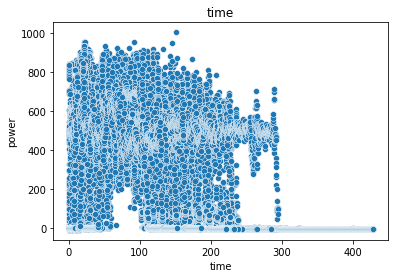

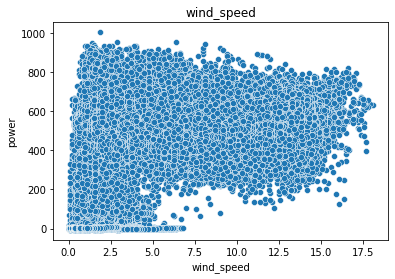

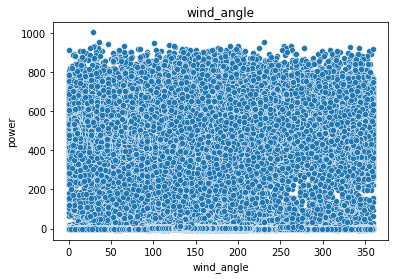

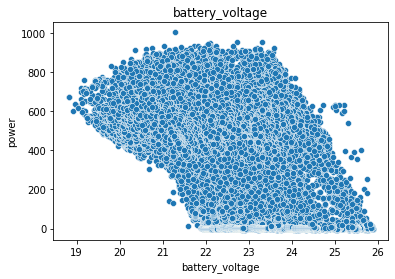

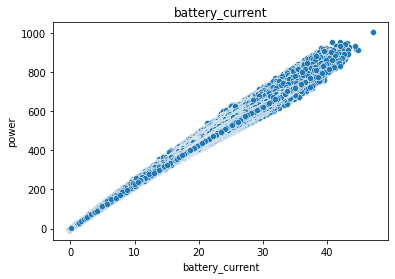

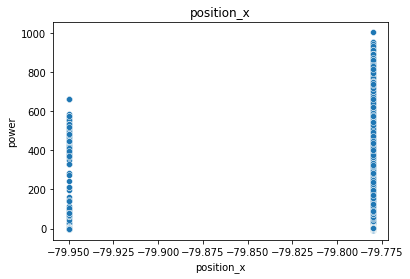

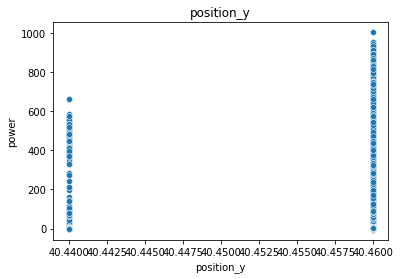

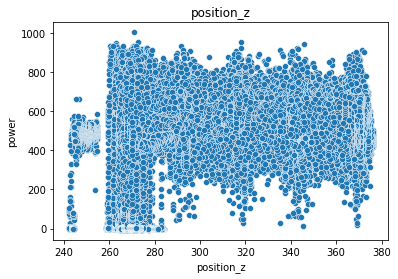

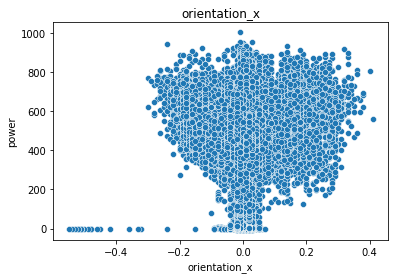

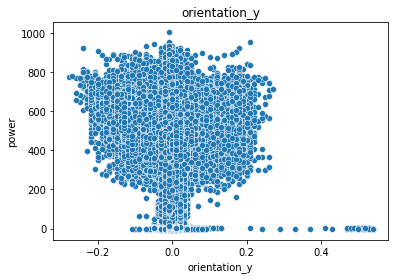

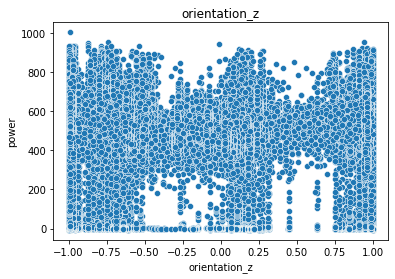

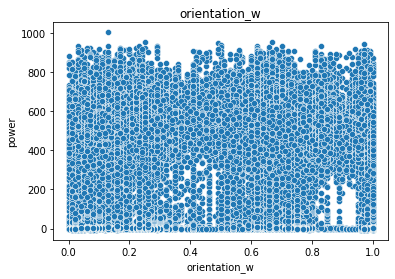

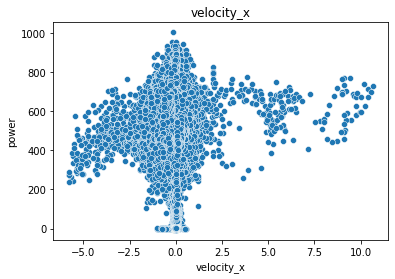

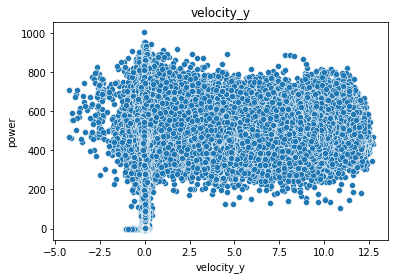

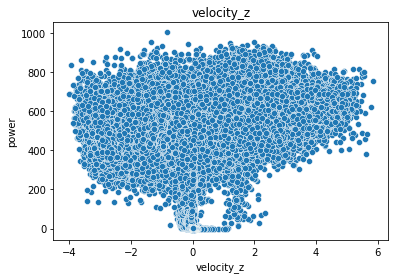

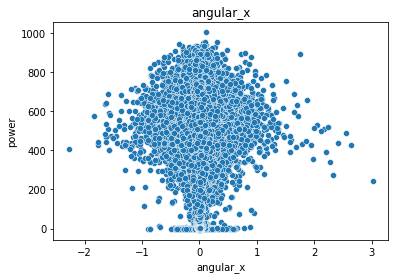

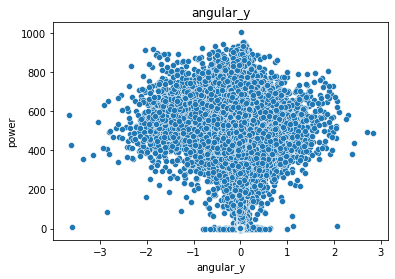

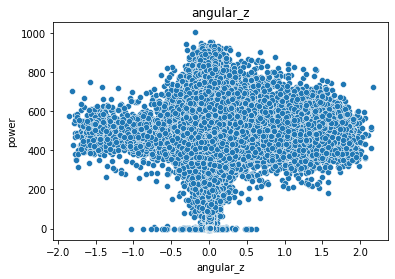

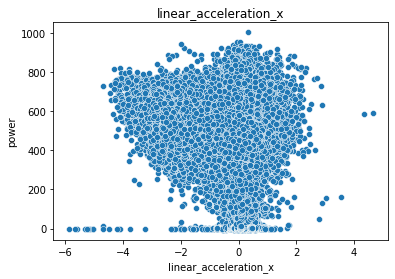

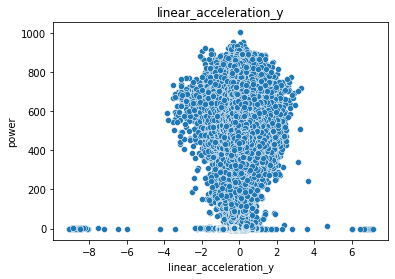

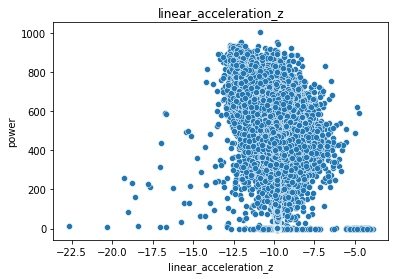

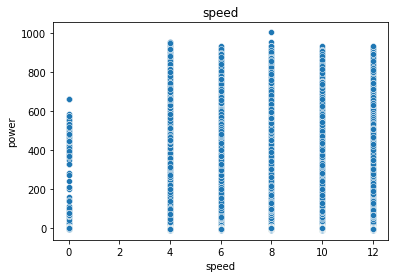

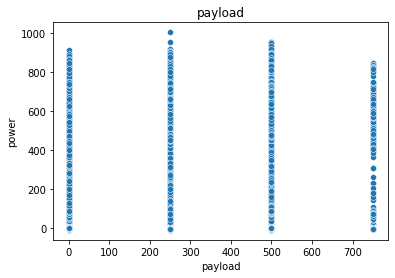

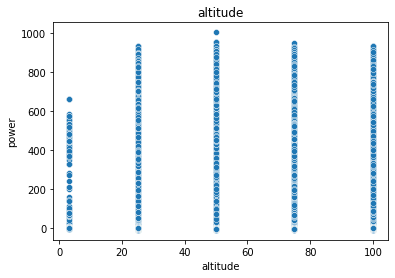

In [138]:
for cat in categories:
    sns.scatterplot(x=flight_0[cat],y=flight_0[target])
    plt.gca().set_title(cat)
    plt.show()

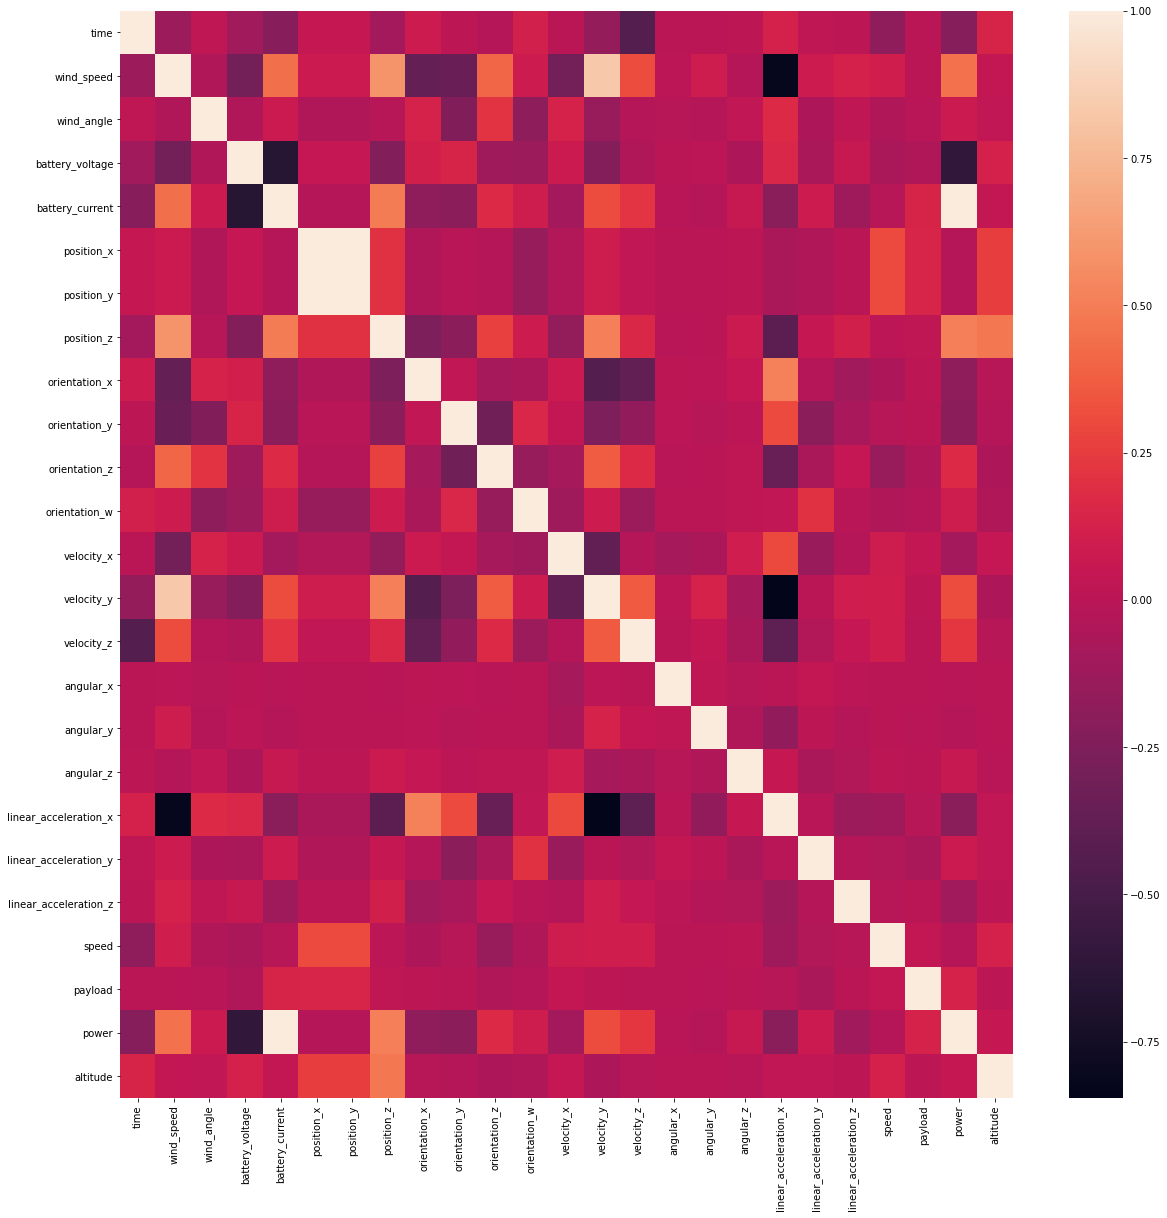

In [139]:
plt.figure(figsize=(20,20))
sns.heatmap(flight_0[numeric].corr())

In [140]:
categories.append('route')
categories

['time',
 'wind_speed',
 'wind_angle',
 'battery_voltage',
 'battery_current',
 'position_x',
 'position_y',
 'position_z',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'orientation_w',
 'velocity_x',
 'velocity_y',
 'velocity_z',
 'angular_x',
 'angular_y',
 'angular_z',
 'linear_acceleration_x',
 'linear_acceleration_y',
 'linear_acceleration_z',
 'speed',
 'payload',
 'altitude',
 'route']

In [141]:
encode = ['route']

In [142]:
df_encoded = pd.get_dummies(flight_0[categories],columns=encode)

In [143]:
df_encoded

,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8
0,0.00,0.1,12.0,24.22,0.09,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.01,-0.00,0.00,0.01,0.00,-0.12,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
1,0.20,0.1,3.0,24.23,0.10,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.02,-0.00,0.01,0.00,-0.00,0.00,0.01,-0.12,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
2,0.30,0.1,352.0,24.23,0.10,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.02,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.13,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
3,0.50,0.1,354.0,24.22,0.10,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.02,0.00,-0.00,0.00,0.00,-0.13,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
4,0.60,0.1,359.0,24.21,0.08,-79.78,40.46,269.34,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.02,-0.00,0.00,-0.01,0.01,-0.12,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,152.10,1.1,198.0,22.86,0.10,-79.78,40.46,271.56,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.01,-0.01,0.01,0.44,-0.27,-9.80,10.0,0.0,100.0,0,0,0,0,0,0,1,0
257892,152.20,1.1,196.0,22.85,0.10,-79.78,40.46,271.57,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.00,0.00,-0.00,0.45,-0.24,-9.79,10.0,0.0,100.0,0,0,0,0,0,0,1,0
257893,152.41,1.2,189.0,22.86,0.11,-79.78,40.46,271.58,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.01,-0.00,0.01,0.44,-0.27,-9.80,10.0,0.0,100.0,0,0,0,0,0,0,1,0
257894,152.60,1.1,187.0,22.85,0.13,-79.78,40.46,271.59,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,-0.01,-0.00,-0.00,0.44,-0.25,-9.79,10.0,0.0,100.0,0,0,0,0,0,0,1,0


In [144]:
df_encoded = df_encoded.drop(['battery_voltage','battery_current'], axis=1)

In [145]:
df_encoded 

,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8
0,0.00,0.1,12.0,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.01,-0.00,0.00,0.01,0.00,-0.12,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
1,0.20,0.1,3.0,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.02,-0.00,0.01,0.00,-0.00,0.00,0.01,-0.12,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
2,0.30,0.1,352.0,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.02,-0.00,0.01,-0.00,-0.00,-0.00,0.00,-0.13,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
3,0.50,0.1,354.0,-79.78,40.46,269.33,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.02,0.00,-0.00,0.00,0.00,-0.13,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
4,0.60,0.1,359.0,-79.78,40.46,269.34,0.00,0.01,-0.26,0.97,-0.01,-0.01,0.02,-0.00,0.00,-0.01,0.01,-0.12,-9.81,4.0,0.0,25.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257891,152.10,1.1,198.0,-79.78,40.46,271.56,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.01,-0.01,0.01,0.44,-0.27,-9.80,10.0,0.0,100.0,0,0,0,0,0,0,1,0
257892,152.20,1.1,196.0,-79.78,40.46,271.57,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.00,0.00,-0.00,0.45,-0.24,-9.79,10.0,0.0,100.0,0,0,0,0,0,0,1,0
257893,152.41,1.2,189.0,-79.78,40.46,271.58,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,0.01,-0.00,0.01,0.44,-0.27,-9.80,10.0,0.0,100.0,0,0,0,0,0,0,1,0
257894,152.60,1.1,187.0,-79.78,40.46,271.59,0.02,0.01,-0.01,1.00,-0.02,0.02,0.02,-0.01,-0.00,-0.00,0.44,-0.25,-9.79,10.0,0.0,100.0,0,0,0,0,0,0,1,0


In [146]:
space_remover_dict = dict(zip(df_encoded.columns,[name.replace(' ','') for name in df_encoded.columns]))
df_encoded = df_encoded.rename(space_remover_dict,axis=1)

In [147]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df_encoded
y = flight_0['power']
X_train, X_test, y_train, y_test = train_test_split(X,y.values,test_size=0.2,random_state=1)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.2/0.8,random_state=1)

In [148]:
X_train.fillna(X_train.mean())

,time,wind_speed,wind_angle,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,orientation_w,velocity_x,velocity_y,velocity_z,angular_x,angular_y,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route_1,route_2,route_3,route_4,route_5,route_6,route_7,route_8
211204,280.70,0.9,26.0,-79.78,40.46,276.07,-0.01,-0.00,-0.98,0.22,-0.02,0.00,0.02,0.01,0.00,0.01,0.03,0.16,-9.81,4.0,0.0,100.0,1,0,0,0,0,0,0,0
33652,79.50,8.3,356.0,-79.78,40.46,352.81,-0.04,-0.07,-0.81,0.57,0.40,0.27,2.06,-0.04,-0.03,-0.04,0.71,1.49,-10.13,10.0,0.0,100.0,1,0,0,0,0,0,0,0
257510,94.91,4.6,343.0,-79.78,40.46,318.33,0.02,-0.03,0.09,0.99,-0.66,4.61,-2.65,-0.24,0.05,-0.20,0.49,0.70,-10.27,10.0,0.0,100.0,0,0,0,0,0,0,1,0
248505,175.50,2.8,185.0,-79.78,40.46,284.71,0.02,0.01,0.10,0.99,-0.01,-0.04,-1.24,-0.02,-0.09,0.10,0.48,-0.24,-9.70,10.0,250.0,75.0,0,0,0,0,0,1,0,0
228164,53.51,3.0,15.0,-79.78,40.46,346.80,-0.01,-0.02,-1.00,0.09,0.03,0.20,1.24,0.04,-0.03,0.09,0.44,0.19,-8.97,12.0,500.0,75.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226110,87.10,7.5,222.0,-79.78,40.46,368.12,-0.03,-0.09,0.96,0.26,-0.74,9.66,1.86,-0.08,0.14,-0.01,-1.16,-0.14,-10.30,10.0,250.0,100.0,1,0,0,0,0,0,0,0
6690,180.30,1.2,166.0,-79.78,40.46,266.51,0.01,-0.01,0.85,0.52,0.01,0.01,-0.01,-0.00,0.00,0.00,-0.01,0.24,-9.80,4.0,0.0,25.0,0,1,0,0,0,0,0,0
221914,48.80,7.0,72.0,-79.78,40.46,343.50,-0.03,0.02,-0.55,0.83,-0.20,8.06,0.40,0.23,0.14,0.03,-0.73,0.12,-9.65,8.0,0.0,75.0,1,0,0,0,0,0,0,0
27447,94.20,15.8,8.0,-79.78,40.46,318.46,-0.17,-0.03,0.16,0.97,-0.16,8.66,3.10,-0.09,-0.00,-0.10,-3.48,-0.07,-9.33,12.0,0.0,50.0,1,0,0,0,0,0,0,0


In [149]:
X_train.isnull().sum()

time                     0
wind_speed               0
wind_angle               0
position_x               0
position_y               0
position_z               0
orientation_x            0
orientation_y            0
orientation_z            0
orientation_w            0
velocity_x               0
velocity_y               0
velocity_z               0
angular_x                0
angular_y                0
angular_z                0
linear_acceleration_x    0
linear_acceleration_y    0
linear_acceleration_z    0
speed                    0
payload                  0
altitude                 0
route_1                  0
route_2                  0
route_3                  0
route_4                  0
route_5                  0
route_6                  0
route_7                  0
route_8                  0
dtype: int64

In [151]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr_pipe = make_pipeline(StandardScaler(),LinearRegression())
lr_pipe.fit(X_train.values,(y_train))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [152]:
lr_pipe.score(X_train,y_train)

0.46474138477482774

In [153]:
lr_pipe.score(X_cv,y_cv)

0.4654011064122901

In [154]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(lr_pipe.predict(X_train),y_train)

136.52198803831766

In [155]:
mean_absolute_error(lr_pipe.predict(X_cv),y_cv)

136.39889707423987

In [156]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(StandardScaler(),Ridge())
ridge.fit(X_train.values,(y_train))


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [157]:
mean_absolute_error(ridge.predict(X_train),y_train)

136.52253050254689

In [158]:
mean_absolute_error(ridge.predict(X_cv),y_cv)

136.3995862035136

In [159]:
from sklearn.linear_model import RidgeCV

sc = StandardScaler()
alphas = [5e-1,1e-1, 1, 10, 50, 100, 175, 250, 325, 500, 750, 1000, 2000, 3000]
ridge_cv = RidgeCV(alphas=alphas,  store_cv_values=True)
ridge_cv.fit(sc.fit_transform(X_train.astype(float)), (y_train))
best_alpha = ridge_cv.alpha_
best_alpha

10.0

In [160]:
ridge = make_pipeline(StandardScaler(),Ridge(alpha=best_alpha))
ridge.fit(X_train.values,(y_train))


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=10.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [161]:
mean_absolute_error(ridge.predict(X_train),y_train)

136.52406364708537

In [162]:
mean_absolute_error(ridge.predict(X_cv),y_cv)

136.4009378932307

In [163]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold

In [164]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, k_features=30, forward=True, floating=False, verbose=0, cv=KFold(5), n_jobs=-1)

sfs.fit(X_train, (y_train))

SequentialFeatureSelector(clone_estimator=True,
                          cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=LinearRegression(copy_X=True,
                                                     fit_intercept=True,
                                                     n_jobs=None,
                                                     normalize=False),
                          floating=False, forward=True, k_features=30,
                          n_jobs=-1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

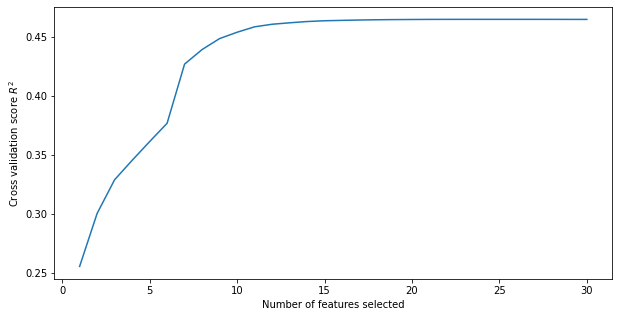

In [165]:

plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score $R^2$")
plt.plot([subset for subset in sfs.subsets_], [sfs.subsets_[subset]['avg_score'] for subset in sfs.subsets_])
plt.show()

In [166]:

features = list(sfs.subsets_[15]['feature_names'])
features

['time',
 'wind_speed',
 'wind_angle',
 'position_x',
 'position_z',
 'orientation_x',
 'orientation_y',
 'orientation_z',
 'velocity_y',
 'velocity_z',
 'linear_acceleration_x',
 'linear_acceleration_z',
 'speed',
 'payload',
 'altitude']

In [167]:
lr_small = make_pipeline(StandardScaler(),LinearRegression())
lr_small.fit(X_train[features].values,(y_train))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [168]:
mean_absolute_error(lr_small.predict(X_train[features]),y_train)

136.7292549795368

In [169]:
mean_absolute_error(lr_small.predict(X_cv[features]),y_cv)

136.62270097326234

In [170]:
lr_small.score(X_train[features],y_train)

0.4634974007461322

In [172]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = make_pipeline(StandardScaler(),MLPRegressor(solver='adam', alpha=1e-10, random_state=1,max_iter=2000))

In [173]:
mlp_regressor.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=1e-10, batch_size='auto',
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=2000, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=1, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [174]:
mean_absolute_error(mlp_regressor.predict(X_train),y_train)

36.18599361481268

In [175]:
mean_absolute_error(mlp_regressor.predict(X_cv),y_cv)

37.425330395290146

In [176]:
mlp_regressor.fit(X_train[features],y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=1e-10, batch_size='auto',
                              beta_1=0.9, beta_2=0.999, early_stopping=False,
                              epsilon=1e-08, hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=2000, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=1, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [177]:
mean_absolute_error(mlp_regressor.predict(X_train[features]),y_train)

34.69828599125156

In [178]:
mean_absolute_error(mlp_regressor.predict(X_cv[features]),y_cv)

35.535724315292235

In [179]:
mlp_regressor.score(X_train[features],y_train)

0.9502256731077904

In [180]:
mlp_regressor.score(X_cv[features],y_cv)

0.9462986927269756

In [181]:
from sklearn.metrics import mean_squared_error
mean_squared_error(mlp_regressor.predict(X_train[features]),y_train,squared=False)

51.066599165990574

In [182]:
mean_squared_error(mlp_regressor.predict(X_cv[features]),y_cv,squared=False)

52.98347842128171

In [183]:
X_f = X[features]


In [184]:

from sklearn.model_selection import KFold
alphas = [5e-1,1e-1, 1, 10, 50, 100, 175, 250, 325, 500, 750, 1000, 2000, 3000]
scores = []
for al in alphas:
    mlp_regressor = make_pipeline(StandardScaler(),MLPRegressor(solver='adam', alpha=al, random_state=1,max_iter=2000))
    mlp_regressor.fit(X_train[features],y_train)
    scores.append(mean_absolute_error(mlp_regressor.predict(X_test[features]),y_test))
    
scores


[35.548945910395354,
 35.85693393456523,
 35.70158271708068,
 37.40588815204891,
 40.89678533626763,
 44.38568820737137,
 49.6296839591725,
 53.69527477439994,
 57.28034237919585,
 64.70938776919114,
 70.33339288857215,
 77.07853130220941,
 108.75188620527932,
 104.09837245276444]